# Noise and uncertainty

## Polling data

Information about polls/surveys and the margin of error in the polls was collected by the class last year.

The data they submitted is in [this google sheet](https://docs.google.com/spreadsheets/d/1wrdE4CZCmWJNOCWq2iAjgjqSGZRofyg-w_BFuJzMPBo/edit?usp=sharing).

Intuitively you might expect that the margin of error gets smaller as the number of people in the poll increases.

## Expected error in polling data

For $N$ counts the expected error is $\sqrt{N}$.

For 100 counts then expected error is 10.

Percent  error is expected error divided by total number of counts:

$$
e = \frac{\sqrt{N}}{N} = \frac{1}{\sqrt{N}}
$$

For 100 counts, the percent error is $e = 0.1$ (or 10%)


In [1]:
import matplotlib.pyplot as plt

import numpy as np

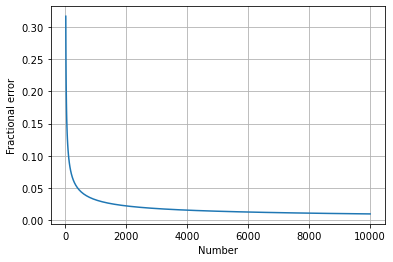

In [2]:
N = np.logspace(1, 4)

plt.plot(N, 1 / np.sqrt(N))
plt.xlabel('Number')
plt.ylabel('Fractional error')
plt.grid()

## Combining errors

### Polling

Imagine two polls. Poll A has 100 people in it, Poll B has 400 people in it.

Formula for error: $\sqrt{N}$

Now imagine you combine those two poll results by adding them. What is the the error in that combined poll?

### 1. Use $\sqrt{N}$, combining $N$ first

+ Combine people from both polls to get 500.
+ Calculate $\sqrt{N}$, get 22.36.

In [3]:
np.sqrt(500)

22.360679774997898

In [4]:
1/np.sqrt(500)

0.044721359549995794

### 2. Combine errors directly using error combination formula

If the error in two measurements are $\sigma_1$ and $\sigma_2$ then the error in the result when you add or subtract them is

$$
\sigma_T = \sqrt{\sigma_1^2 + \sigma_2^2}
$$

Try this for the combining two polls case, where $\sigma_1 = \sqrt{100} = 10$ and $\sigma_2 = \sqrt{400} = 20$

In [5]:
print(np.sqrt(10**2 + 20**2))

22.360679774997898


Suppose a pixel in an image whose value is 100, so percent error 0.1, and you want to get the percent error down to 0.05.

What does the pixel value need to be so the percent error is 0.05?  400

Imagine the first image was a 30 second exposure...what does the exposure time need to be in the second image to get 400 counts?  4 times longer, so 120 seconds.

This is the same as the result we got using method 1.

+ 104
+ 100.14


#### Exercise

Suppose you measure the number of pohotons (amount of light) received by the camera and it is 10,000. The read noise, written $\sigma_R$, for our old camera at the telescope was 30.

What is the total error in measurement, including error in the counts and the read noise?

Put your answer into chat....

+ Error 1, due to counts: $\sigma_1 = \sqrt{N} = \sqrt{10000} = 100$
+ Error 2, due to read noise: $\sigma_2 = 30$

Combine using

$$
\sigma_T = \sqrt{\sigma_1^2 + \sigma_2^2} = \sqrt{100^2 + 30^2} = 104.4
$$



In [6]:
np.sqrt(100**2 + 30**2)

104.4030650891055

REDO error calculation, but for 450 photons. What is $\sigma_T$ in this case?

Answers from class:

+ 36.7

$$
\sigma_T^2 = \sqrt{(450 + 900)} = 36.74
$$


Last time: to measure the amount of light from a star, start with the counts in the image for star, subtract the counts for the sky.

For our example pixel, counts where star is  are 300, sky near there is 40, so counts because of star are 260.

What is the error in that final measurement?

$$
\sqrt{300 + 40} = 18.4
$$

Towards a more general formula for error (this is NOT complete or correct and uses slightly different notation from the book):

$$
\sqrt{N_{star} + N_{sky} + N_{dark} + (\sigma_R)^2}
$$

Here we are combining several errros:

+ Counts from the star
+ Counts from the sky (which we subtract)
+ Counts from dark current (which we also subtract)
+ Read noise